# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [2]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

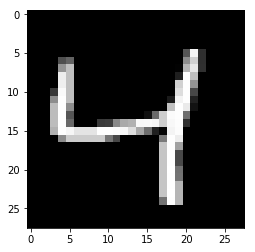

In [4]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [9]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value

image_size = 784

# Input and target placeholders
inputs_ = tf.placeholder(tf.float32, (None, image_size), name='inputs')
targets_ = tf.placeholder(tf.float32, (None, image_size), name='targets')

# Output of hidden layer, single fully connected layer here with 
# ReLU activation
encoded = tf.layers.dense(inputs_, encoding_dim, activation=tf.nn.relu)

# Output layer logits, fully connected layer with no activation
logits = tf.layers.dense(encoded, image_size, activation=None)
# Sigmoid output from logits
decoded = tf.nn.sigmoid(logits, name='output')

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits,name='loss')
# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer(0.001).minimize(cost)

## Training

In [10]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [11]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6928
Epoch: 1/20... Training loss: 0.6889
Epoch: 1/20... Training loss: 0.6854
Epoch: 1/20... Training loss: 0.6807
Epoch: 1/20... Training loss: 0.6754
Epoch: 1/20... Training loss: 0.6690
Epoch: 1/20... Training loss: 0.6608
Epoch: 1/20... Training loss: 0.6518
Epoch: 1/20... Training loss: 0.6418
Epoch: 1/20... Training loss: 0.6290
Epoch: 1/20... Training loss: 0.6148
Epoch: 1/20... Training loss: 0.6008
Epoch: 1/20... Training loss: 0.5872
Epoch: 1/20... Training loss: 0.5705
Epoch: 1/20... Training loss: 0.5521
Epoch: 1/20... Training loss: 0.5365
Epoch: 1/20... Training loss: 0.5175
Epoch: 1/20... Training loss: 0.4978
Epoch: 1/20... Training loss: 0.4791
Epoch: 1/20... Training loss: 0.4621
Epoch: 1/20... Training loss: 0.4461
Epoch: 1/20... Training loss: 0.4228
Epoch: 1/20... Training loss: 0.4112
Epoch: 1/20... Training loss: 0.4012
Epoch: 1/20... Training loss: 0.3854
Epoch: 1/20... Training loss: 0.3726
Epoch: 1/20... Training loss: 0.3597
E

Epoch: 1/20... Training loss: 0.2034
Epoch: 1/20... Training loss: 0.1986
Epoch: 1/20... Training loss: 0.1948
Epoch: 1/20... Training loss: 0.2005
Epoch: 1/20... Training loss: 0.1968
Epoch: 1/20... Training loss: 0.1936
Epoch: 1/20... Training loss: 0.1934
Epoch: 1/20... Training loss: 0.1963
Epoch: 1/20... Training loss: 0.1947
Epoch: 1/20... Training loss: 0.1958
Epoch: 1/20... Training loss: 0.1939
Epoch: 1/20... Training loss: 0.1986
Epoch: 1/20... Training loss: 0.1985
Epoch: 1/20... Training loss: 0.1931
Epoch: 1/20... Training loss: 0.1970
Epoch: 1/20... Training loss: 0.1924
Epoch: 1/20... Training loss: 0.1992
Epoch: 1/20... Training loss: 0.1891
Epoch: 1/20... Training loss: 0.2013
Epoch: 1/20... Training loss: 0.1906
Epoch: 1/20... Training loss: 0.1874
Epoch: 1/20... Training loss: 0.1920
Epoch: 1/20... Training loss: 0.1955
Epoch: 1/20... Training loss: 0.1956
Epoch: 1/20... Training loss: 0.1921
Epoch: 1/20... Training loss: 0.1894
Epoch: 1/20... Training loss: 0.1937
E

Epoch: 2/20... Training loss: 0.1575
Epoch: 2/20... Training loss: 0.1537
Epoch: 2/20... Training loss: 0.1622
Epoch: 2/20... Training loss: 0.1644
Epoch: 2/20... Training loss: 0.1537
Epoch: 2/20... Training loss: 0.1533
Epoch: 2/20... Training loss: 0.1543
Epoch: 2/20... Training loss: 0.1625
Epoch: 2/20... Training loss: 0.1536
Epoch: 2/20... Training loss: 0.1480
Epoch: 2/20... Training loss: 0.1561
Epoch: 2/20... Training loss: 0.1576
Epoch: 2/20... Training loss: 0.1584
Epoch: 2/20... Training loss: 0.1494
Epoch: 2/20... Training loss: 0.1552
Epoch: 2/20... Training loss: 0.1636
Epoch: 2/20... Training loss: 0.1558
Epoch: 2/20... Training loss: 0.1576
Epoch: 2/20... Training loss: 0.1581
Epoch: 2/20... Training loss: 0.1520
Epoch: 2/20... Training loss: 0.1585
Epoch: 2/20... Training loss: 0.1509
Epoch: 2/20... Training loss: 0.1575
Epoch: 2/20... Training loss: 0.1519
Epoch: 2/20... Training loss: 0.1587
Epoch: 2/20... Training loss: 0.1529
Epoch: 2/20... Training loss: 0.1492
E

Epoch: 3/20... Training loss: 0.1300
Epoch: 3/20... Training loss: 0.1378
Epoch: 3/20... Training loss: 0.1325
Epoch: 3/20... Training loss: 0.1324
Epoch: 3/20... Training loss: 0.1318
Epoch: 3/20... Training loss: 0.1350
Epoch: 3/20... Training loss: 0.1297
Epoch: 3/20... Training loss: 0.1367
Epoch: 3/20... Training loss: 0.1362
Epoch: 3/20... Training loss: 0.1322
Epoch: 3/20... Training loss: 0.1377
Epoch: 3/20... Training loss: 0.1359
Epoch: 3/20... Training loss: 0.1341
Epoch: 3/20... Training loss: 0.1348
Epoch: 3/20... Training loss: 0.1321
Epoch: 3/20... Training loss: 0.1353
Epoch: 3/20... Training loss: 0.1313
Epoch: 3/20... Training loss: 0.1307
Epoch: 3/20... Training loss: 0.1376
Epoch: 3/20... Training loss: 0.1354
Epoch: 3/20... Training loss: 0.1325
Epoch: 3/20... Training loss: 0.1385
Epoch: 3/20... Training loss: 0.1299
Epoch: 3/20... Training loss: 0.1318
Epoch: 3/20... Training loss: 0.1395
Epoch: 3/20... Training loss: 0.1373
Epoch: 3/20... Training loss: 0.1345
E

Epoch: 4/20... Training loss: 0.1236
Epoch: 4/20... Training loss: 0.1187
Epoch: 4/20... Training loss: 0.1182
Epoch: 4/20... Training loss: 0.1220
Epoch: 4/20... Training loss: 0.1250
Epoch: 4/20... Training loss: 0.1205
Epoch: 4/20... Training loss: 0.1205
Epoch: 4/20... Training loss: 0.1193
Epoch: 4/20... Training loss: 0.1226
Epoch: 4/20... Training loss: 0.1223
Epoch: 4/20... Training loss: 0.1180
Epoch: 4/20... Training loss: 0.1192
Epoch: 4/20... Training loss: 0.1255
Epoch: 4/20... Training loss: 0.1236
Epoch: 4/20... Training loss: 0.1216
Epoch: 4/20... Training loss: 0.1243
Epoch: 4/20... Training loss: 0.1225
Epoch: 4/20... Training loss: 0.1198
Epoch: 4/20... Training loss: 0.1269
Epoch: 4/20... Training loss: 0.1241
Epoch: 4/20... Training loss: 0.1170
Epoch: 4/20... Training loss: 0.1261
Epoch: 4/20... Training loss: 0.1231
Epoch: 4/20... Training loss: 0.1216
Epoch: 4/20... Training loss: 0.1208
Epoch: 4/20... Training loss: 0.1287
Epoch: 4/20... Training loss: 0.1210
E

Epoch: 5/20... Training loss: 0.1156
Epoch: 5/20... Training loss: 0.1128
Epoch: 5/20... Training loss: 0.1173
Epoch: 5/20... Training loss: 0.1126
Epoch: 5/20... Training loss: 0.1185
Epoch: 5/20... Training loss: 0.1104
Epoch: 5/20... Training loss: 0.1143
Epoch: 5/20... Training loss: 0.1146
Epoch: 5/20... Training loss: 0.1124
Epoch: 5/20... Training loss: 0.1138
Epoch: 5/20... Training loss: 0.1099
Epoch: 5/20... Training loss: 0.1105
Epoch: 5/20... Training loss: 0.1148
Epoch: 5/20... Training loss: 0.1093
Epoch: 5/20... Training loss: 0.1140
Epoch: 5/20... Training loss: 0.1124
Epoch: 5/20... Training loss: 0.1152
Epoch: 5/20... Training loss: 0.1061
Epoch: 5/20... Training loss: 0.1111
Epoch: 5/20... Training loss: 0.1122
Epoch: 5/20... Training loss: 0.1131
Epoch: 5/20... Training loss: 0.1112
Epoch: 5/20... Training loss: 0.1131
Epoch: 5/20... Training loss: 0.1122
Epoch: 5/20... Training loss: 0.1155
Epoch: 5/20... Training loss: 0.1165
Epoch: 5/20... Training loss: 0.1149
E

Epoch: 5/20... Training loss: 0.1104
Epoch: 5/20... Training loss: 0.1081
Epoch: 5/20... Training loss: 0.1071
Epoch: 5/20... Training loss: 0.1059
Epoch: 5/20... Training loss: 0.1061
Epoch: 5/20... Training loss: 0.1118
Epoch: 5/20... Training loss: 0.1101
Epoch: 5/20... Training loss: 0.1059
Epoch: 5/20... Training loss: 0.1077
Epoch: 5/20... Training loss: 0.1084
Epoch: 5/20... Training loss: 0.1070
Epoch: 5/20... Training loss: 0.1066
Epoch: 5/20... Training loss: 0.1099
Epoch: 5/20... Training loss: 0.1035
Epoch: 5/20... Training loss: 0.1085
Epoch: 5/20... Training loss: 0.1105
Epoch: 5/20... Training loss: 0.1069
Epoch: 5/20... Training loss: 0.1087
Epoch: 5/20... Training loss: 0.1088
Epoch: 5/20... Training loss: 0.1073
Epoch: 5/20... Training loss: 0.1043
Epoch: 5/20... Training loss: 0.1072
Epoch: 5/20... Training loss: 0.1062
Epoch: 5/20... Training loss: 0.1077
Epoch: 5/20... Training loss: 0.1034
Epoch: 5/20... Training loss: 0.1056
Epoch: 5/20... Training loss: 0.1047
E

Epoch: 6/20... Training loss: 0.1037
Epoch: 6/20... Training loss: 0.1058
Epoch: 6/20... Training loss: 0.1045
Epoch: 6/20... Training loss: 0.1048
Epoch: 6/20... Training loss: 0.1006
Epoch: 6/20... Training loss: 0.1087
Epoch: 6/20... Training loss: 0.1056
Epoch: 6/20... Training loss: 0.1033
Epoch: 6/20... Training loss: 0.0986
Epoch: 6/20... Training loss: 0.1047
Epoch: 6/20... Training loss: 0.1010
Epoch: 6/20... Training loss: 0.1054
Epoch: 6/20... Training loss: 0.1007
Epoch: 6/20... Training loss: 0.1052
Epoch: 6/20... Training loss: 0.1040
Epoch: 6/20... Training loss: 0.1047
Epoch: 6/20... Training loss: 0.1037
Epoch: 6/20... Training loss: 0.1004
Epoch: 6/20... Training loss: 0.1057
Epoch: 6/20... Training loss: 0.1016
Epoch: 6/20... Training loss: 0.1047
Epoch: 6/20... Training loss: 0.1043
Epoch: 6/20... Training loss: 0.1017
Epoch: 6/20... Training loss: 0.1030
Epoch: 6/20... Training loss: 0.0974
Epoch: 6/20... Training loss: 0.1080
Epoch: 6/20... Training loss: 0.1048
E

Epoch: 7/20... Training loss: 0.1009
Epoch: 7/20... Training loss: 0.0997
Epoch: 7/20... Training loss: 0.0996
Epoch: 7/20... Training loss: 0.1007
Epoch: 7/20... Training loss: 0.1021
Epoch: 7/20... Training loss: 0.1011
Epoch: 7/20... Training loss: 0.0969
Epoch: 7/20... Training loss: 0.1002
Epoch: 7/20... Training loss: 0.0976
Epoch: 7/20... Training loss: 0.1015
Epoch: 7/20... Training loss: 0.0964
Epoch: 7/20... Training loss: 0.0996
Epoch: 7/20... Training loss: 0.1043
Epoch: 7/20... Training loss: 0.1026
Epoch: 7/20... Training loss: 0.0964
Epoch: 7/20... Training loss: 0.1012
Epoch: 7/20... Training loss: 0.1026
Epoch: 7/20... Training loss: 0.1013
Epoch: 7/20... Training loss: 0.1001
Epoch: 7/20... Training loss: 0.0978
Epoch: 7/20... Training loss: 0.0973
Epoch: 7/20... Training loss: 0.1015
Epoch: 7/20... Training loss: 0.0999
Epoch: 7/20... Training loss: 0.1002
Epoch: 7/20... Training loss: 0.0985
Epoch: 7/20... Training loss: 0.1006
Epoch: 7/20... Training loss: 0.0999
E

Epoch: 8/20... Training loss: 0.0983
Epoch: 8/20... Training loss: 0.0970
Epoch: 8/20... Training loss: 0.0956
Epoch: 8/20... Training loss: 0.1010
Epoch: 8/20... Training loss: 0.0972
Epoch: 8/20... Training loss: 0.0959
Epoch: 8/20... Training loss: 0.0994
Epoch: 8/20... Training loss: 0.0997
Epoch: 8/20... Training loss: 0.0987
Epoch: 8/20... Training loss: 0.0997
Epoch: 8/20... Training loss: 0.1012
Epoch: 8/20... Training loss: 0.0972
Epoch: 8/20... Training loss: 0.0977
Epoch: 8/20... Training loss: 0.0983
Epoch: 8/20... Training loss: 0.0968
Epoch: 8/20... Training loss: 0.0960
Epoch: 8/20... Training loss: 0.0988
Epoch: 8/20... Training loss: 0.0969
Epoch: 8/20... Training loss: 0.0991
Epoch: 8/20... Training loss: 0.0992
Epoch: 8/20... Training loss: 0.0968
Epoch: 8/20... Training loss: 0.0965
Epoch: 8/20... Training loss: 0.0964
Epoch: 8/20... Training loss: 0.0967
Epoch: 8/20... Training loss: 0.1014
Epoch: 8/20... Training loss: 0.0942
Epoch: 8/20... Training loss: 0.0984
E

Epoch: 9/20... Training loss: 0.0938
Epoch: 9/20... Training loss: 0.0983
Epoch: 9/20... Training loss: 0.0903
Epoch: 9/20... Training loss: 0.0984
Epoch: 9/20... Training loss: 0.0928
Epoch: 9/20... Training loss: 0.0962
Epoch: 9/20... Training loss: 0.0932
Epoch: 9/20... Training loss: 0.0968
Epoch: 9/20... Training loss: 0.0963
Epoch: 9/20... Training loss: 0.0953
Epoch: 9/20... Training loss: 0.0969
Epoch: 9/20... Training loss: 0.0965
Epoch: 9/20... Training loss: 0.0946
Epoch: 9/20... Training loss: 0.0945
Epoch: 9/20... Training loss: 0.0958
Epoch: 9/20... Training loss: 0.0940
Epoch: 9/20... Training loss: 0.1012
Epoch: 9/20... Training loss: 0.0956
Epoch: 9/20... Training loss: 0.0965
Epoch: 9/20... Training loss: 0.0947
Epoch: 9/20... Training loss: 0.0968
Epoch: 9/20... Training loss: 0.0964
Epoch: 9/20... Training loss: 0.0976
Epoch: 9/20... Training loss: 0.0984
Epoch: 9/20... Training loss: 0.1005
Epoch: 9/20... Training loss: 0.0982
Epoch: 9/20... Training loss: 0.0967
E

Epoch: 10/20... Training loss: 0.0951
Epoch: 10/20... Training loss: 0.0964
Epoch: 10/20... Training loss: 0.0959
Epoch: 10/20... Training loss: 0.0953
Epoch: 10/20... Training loss: 0.0944
Epoch: 10/20... Training loss: 0.0950
Epoch: 10/20... Training loss: 0.0934
Epoch: 10/20... Training loss: 0.0986
Epoch: 10/20... Training loss: 0.0943
Epoch: 10/20... Training loss: 0.0979
Epoch: 10/20... Training loss: 0.0963
Epoch: 10/20... Training loss: 0.0945
Epoch: 10/20... Training loss: 0.0972
Epoch: 10/20... Training loss: 0.0977
Epoch: 10/20... Training loss: 0.0987
Epoch: 10/20... Training loss: 0.0921
Epoch: 10/20... Training loss: 0.0930
Epoch: 10/20... Training loss: 0.0923
Epoch: 10/20... Training loss: 0.0978
Epoch: 10/20... Training loss: 0.0986
Epoch: 10/20... Training loss: 0.0959
Epoch: 10/20... Training loss: 0.0934
Epoch: 10/20... Training loss: 0.0935
Epoch: 10/20... Training loss: 0.0953
Epoch: 10/20... Training loss: 0.0973
Epoch: 10/20... Training loss: 0.0942
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0946
Epoch: 11/20... Training loss: 0.0948
Epoch: 11/20... Training loss: 0.0980
Epoch: 11/20... Training loss: 0.0976
Epoch: 11/20... Training loss: 0.0928
Epoch: 11/20... Training loss: 0.0949
Epoch: 11/20... Training loss: 0.0955
Epoch: 11/20... Training loss: 0.0924
Epoch: 11/20... Training loss: 0.0935
Epoch: 11/20... Training loss: 0.0927
Epoch: 11/20... Training loss: 0.0954
Epoch: 11/20... Training loss: 0.0958
Epoch: 11/20... Training loss: 0.0923
Epoch: 11/20... Training loss: 0.0935
Epoch: 11/20... Training loss: 0.0975
Epoch: 11/20... Training loss: 0.0997
Epoch: 11/20... Training loss: 0.0952
Epoch: 11/20... Training loss: 0.0930
Epoch: 11/20... Training loss: 0.0962
Epoch: 11/20... Training loss: 0.0936
Epoch: 11/20... Training loss: 0.0935
Epoch: 11/20... Training loss: 0.0941
Epoch: 11/20... Training loss: 0.0954
Epoch: 11/20... Training loss: 0.0937
Epoch: 11/20... Training loss: 0.0927
Epoch: 11/20... Training loss: 0.0952
Epoch: 11/20

Epoch: 11/20... Training loss: 0.0902
Epoch: 11/20... Training loss: 0.0953
Epoch: 11/20... Training loss: 0.0939
Epoch: 11/20... Training loss: 0.0967
Epoch: 11/20... Training loss: 0.0918
Epoch: 11/20... Training loss: 0.0950
Epoch: 11/20... Training loss: 0.0935
Epoch: 11/20... Training loss: 0.0908
Epoch: 11/20... Training loss: 0.0951
Epoch: 11/20... Training loss: 0.0952
Epoch: 11/20... Training loss: 0.0926
Epoch: 11/20... Training loss: 0.0956
Epoch: 11/20... Training loss: 0.0964
Epoch: 11/20... Training loss: 0.0968
Epoch: 11/20... Training loss: 0.0950
Epoch: 11/20... Training loss: 0.0959
Epoch: 11/20... Training loss: 0.0919
Epoch: 11/20... Training loss: 0.0955
Epoch: 11/20... Training loss: 0.0951
Epoch: 11/20... Training loss: 0.0956
Epoch: 11/20... Training loss: 0.0947
Epoch: 11/20... Training loss: 0.0980
Epoch: 11/20... Training loss: 0.0926
Epoch: 11/20... Training loss: 0.0969
Epoch: 11/20... Training loss: 0.0914
Epoch: 11/20... Training loss: 0.0925
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0939
Epoch: 12/20... Training loss: 0.0905
Epoch: 12/20... Training loss: 0.0947
Epoch: 12/20... Training loss: 0.0940
Epoch: 12/20... Training loss: 0.0946
Epoch: 12/20... Training loss: 0.0926
Epoch: 12/20... Training loss: 0.0944
Epoch: 12/20... Training loss: 0.0935
Epoch: 12/20... Training loss: 0.0958
Epoch: 12/20... Training loss: 0.0929
Epoch: 12/20... Training loss: 0.0906
Epoch: 12/20... Training loss: 0.0954
Epoch: 12/20... Training loss: 0.0968
Epoch: 12/20... Training loss: 0.0963
Epoch: 12/20... Training loss: 0.0963
Epoch: 12/20... Training loss: 0.0928
Epoch: 12/20... Training loss: 0.0906
Epoch: 12/20... Training loss: 0.0982
Epoch: 12/20... Training loss: 0.0939
Epoch: 12/20... Training loss: 0.0918
Epoch: 12/20... Training loss: 0.0931
Epoch: 12/20... Training loss: 0.0936
Epoch: 12/20... Training loss: 0.0990
Epoch: 12/20... Training loss: 0.0944
Epoch: 12/20... Training loss: 0.0958
Epoch: 12/20... Training loss: 0.0958
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0900
Epoch: 13/20... Training loss: 0.0963
Epoch: 13/20... Training loss: 0.0926
Epoch: 13/20... Training loss: 0.0955
Epoch: 13/20... Training loss: 0.0901
Epoch: 13/20... Training loss: 0.0938
Epoch: 13/20... Training loss: 0.0970
Epoch: 13/20... Training loss: 0.0950
Epoch: 13/20... Training loss: 0.0959
Epoch: 13/20... Training loss: 0.0919
Epoch: 13/20... Training loss: 0.0957
Epoch: 13/20... Training loss: 0.0966
Epoch: 13/20... Training loss: 0.0935
Epoch: 13/20... Training loss: 0.0959
Epoch: 13/20... Training loss: 0.0975
Epoch: 13/20... Training loss: 0.0924
Epoch: 13/20... Training loss: 0.0943
Epoch: 13/20... Training loss: 0.0927
Epoch: 13/20... Training loss: 0.0913
Epoch: 13/20... Training loss: 0.0943
Epoch: 13/20... Training loss: 0.0979
Epoch: 13/20... Training loss: 0.0891
Epoch: 13/20... Training loss: 0.0868
Epoch: 13/20... Training loss: 0.0967
Epoch: 13/20... Training loss: 0.0946
Epoch: 13/20... Training loss: 0.0923
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0921
Epoch: 14/20... Training loss: 0.0928
Epoch: 14/20... Training loss: 0.0924
Epoch: 14/20... Training loss: 0.0935
Epoch: 14/20... Training loss: 0.0931
Epoch: 14/20... Training loss: 0.0952
Epoch: 14/20... Training loss: 0.0975
Epoch: 14/20... Training loss: 0.0932
Epoch: 14/20... Training loss: 0.0967
Epoch: 14/20... Training loss: 0.0945
Epoch: 14/20... Training loss: 0.0921
Epoch: 14/20... Training loss: 0.0940
Epoch: 14/20... Training loss: 0.0976
Epoch: 14/20... Training loss: 0.0902
Epoch: 14/20... Training loss: 0.0919
Epoch: 14/20... Training loss: 0.0944
Epoch: 14/20... Training loss: 0.0953
Epoch: 14/20... Training loss: 0.0927
Epoch: 14/20... Training loss: 0.0950
Epoch: 14/20... Training loss: 0.0923
Epoch: 14/20... Training loss: 0.0930
Epoch: 14/20... Training loss: 0.0920
Epoch: 14/20... Training loss: 0.0947
Epoch: 14/20... Training loss: 0.0973
Epoch: 14/20... Training loss: 0.0920
Epoch: 14/20... Training loss: 0.0941
Epoch: 14/20

Epoch: 14/20... Training loss: 0.0950
Epoch: 14/20... Training loss: 0.0967
Epoch: 14/20... Training loss: 0.0982
Epoch: 14/20... Training loss: 0.0928
Epoch: 14/20... Training loss: 0.0961
Epoch: 14/20... Training loss: 0.0917
Epoch: 14/20... Training loss: 0.0933
Epoch: 14/20... Training loss: 0.0877
Epoch: 14/20... Training loss: 0.0909
Epoch: 14/20... Training loss: 0.0962
Epoch: 14/20... Training loss: 0.0921
Epoch: 14/20... Training loss: 0.0960
Epoch: 14/20... Training loss: 0.0932
Epoch: 14/20... Training loss: 0.0938
Epoch: 14/20... Training loss: 0.0946
Epoch: 14/20... Training loss: 0.0934
Epoch: 14/20... Training loss: 0.0936
Epoch: 14/20... Training loss: 0.0934
Epoch: 14/20... Training loss: 0.0918
Epoch: 14/20... Training loss: 0.0903
Epoch: 14/20... Training loss: 0.0954
Epoch: 14/20... Training loss: 0.0949
Epoch: 14/20... Training loss: 0.0925
Epoch: 14/20... Training loss: 0.0938
Epoch: 14/20... Training loss: 0.0956
Epoch: 14/20... Training loss: 0.0899
Epoch: 14/20

Epoch: 15/20... Training loss: 0.0957
Epoch: 15/20... Training loss: 0.0949
Epoch: 15/20... Training loss: 0.0948
Epoch: 15/20... Training loss: 0.0929
Epoch: 15/20... Training loss: 0.0941
Epoch: 15/20... Training loss: 0.0941
Epoch: 15/20... Training loss: 0.0910
Epoch: 15/20... Training loss: 0.0915
Epoch: 15/20... Training loss: 0.0912
Epoch: 15/20... Training loss: 0.0938
Epoch: 15/20... Training loss: 0.0914
Epoch: 15/20... Training loss: 0.0911
Epoch: 15/20... Training loss: 0.0892
Epoch: 15/20... Training loss: 0.0924
Epoch: 15/20... Training loss: 0.0924
Epoch: 15/20... Training loss: 0.0962
Epoch: 15/20... Training loss: 0.0941
Epoch: 15/20... Training loss: 0.0930
Epoch: 15/20... Training loss: 0.0909
Epoch: 15/20... Training loss: 0.0888
Epoch: 15/20... Training loss: 0.0951
Epoch: 15/20... Training loss: 0.0954
Epoch: 15/20... Training loss: 0.0949
Epoch: 15/20... Training loss: 0.0911
Epoch: 15/20... Training loss: 0.0935
Epoch: 15/20... Training loss: 0.0936
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0943
Epoch: 16/20... Training loss: 0.0898
Epoch: 16/20... Training loss: 0.0940
Epoch: 16/20... Training loss: 0.0936
Epoch: 16/20... Training loss: 0.0949
Epoch: 16/20... Training loss: 0.0928
Epoch: 16/20... Training loss: 0.0905
Epoch: 16/20... Training loss: 0.0936
Epoch: 16/20... Training loss: 0.0916
Epoch: 16/20... Training loss: 0.0948
Epoch: 16/20... Training loss: 0.0913
Epoch: 16/20... Training loss: 0.0912
Epoch: 16/20... Training loss: 0.0931
Epoch: 16/20... Training loss: 0.0910
Epoch: 16/20... Training loss: 0.0927
Epoch: 16/20... Training loss: 0.0908
Epoch: 16/20... Training loss: 0.0944
Epoch: 16/20... Training loss: 0.0897
Epoch: 16/20... Training loss: 0.0947
Epoch: 16/20... Training loss: 0.0928
Epoch: 16/20... Training loss: 0.0909
Epoch: 16/20... Training loss: 0.0893
Epoch: 16/20... Training loss: 0.0943
Epoch: 16/20... Training loss: 0.0911
Epoch: 16/20... Training loss: 0.0918
Epoch: 16/20... Training loss: 0.0964
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0938
Epoch: 17/20... Training loss: 0.0915
Epoch: 17/20... Training loss: 0.0914
Epoch: 17/20... Training loss: 0.0933
Epoch: 17/20... Training loss: 0.0881
Epoch: 17/20... Training loss: 0.0964
Epoch: 17/20... Training loss: 0.0955
Epoch: 17/20... Training loss: 0.0896
Epoch: 17/20... Training loss: 0.0930
Epoch: 17/20... Training loss: 0.0908
Epoch: 17/20... Training loss: 0.0908
Epoch: 17/20... Training loss: 0.0949
Epoch: 17/20... Training loss: 0.0958
Epoch: 17/20... Training loss: 0.0948
Epoch: 17/20... Training loss: 0.0925
Epoch: 17/20... Training loss: 0.0975
Epoch: 17/20... Training loss: 0.0971
Epoch: 17/20... Training loss: 0.0937
Epoch: 17/20... Training loss: 0.0951
Epoch: 17/20... Training loss: 0.0965
Epoch: 17/20... Training loss: 0.0961
Epoch: 17/20... Training loss: 0.0919
Epoch: 17/20... Training loss: 0.0930
Epoch: 17/20... Training loss: 0.0968
Epoch: 17/20... Training loss: 0.0947
Epoch: 17/20... Training loss: 0.0983
Epoch: 17/20

Epoch: 17/20... Training loss: 0.0949
Epoch: 17/20... Training loss: 0.0936
Epoch: 17/20... Training loss: 0.0963
Epoch: 17/20... Training loss: 0.0920
Epoch: 17/20... Training loss: 0.0939
Epoch: 17/20... Training loss: 0.0958
Epoch: 17/20... Training loss: 0.0943
Epoch: 17/20... Training loss: 0.0940
Epoch: 17/20... Training loss: 0.0921
Epoch: 17/20... Training loss: 0.0913
Epoch: 17/20... Training loss: 0.0924
Epoch: 17/20... Training loss: 0.0901
Epoch: 17/20... Training loss: 0.0934
Epoch: 17/20... Training loss: 0.0928
Epoch: 17/20... Training loss: 0.0941
Epoch: 17/20... Training loss: 0.0952
Epoch: 17/20... Training loss: 0.0917
Epoch: 17/20... Training loss: 0.0930
Epoch: 18/20... Training loss: 0.0904
Epoch: 18/20... Training loss: 0.0930
Epoch: 18/20... Training loss: 0.0912
Epoch: 18/20... Training loss: 0.0953
Epoch: 18/20... Training loss: 0.0921
Epoch: 18/20... Training loss: 0.0943
Epoch: 18/20... Training loss: 0.0886
Epoch: 18/20... Training loss: 0.0947
Epoch: 18/20

Epoch: 18/20... Training loss: 0.0904
Epoch: 18/20... Training loss: 0.0922
Epoch: 18/20... Training loss: 0.0930
Epoch: 18/20... Training loss: 0.0948
Epoch: 18/20... Training loss: 0.0920
Epoch: 18/20... Training loss: 0.0934
Epoch: 18/20... Training loss: 0.0928
Epoch: 18/20... Training loss: 0.0934
Epoch: 18/20... Training loss: 0.0917
Epoch: 18/20... Training loss: 0.0944
Epoch: 18/20... Training loss: 0.0875
Epoch: 18/20... Training loss: 0.0921
Epoch: 18/20... Training loss: 0.0931
Epoch: 18/20... Training loss: 0.0943
Epoch: 18/20... Training loss: 0.0933
Epoch: 18/20... Training loss: 0.0967
Epoch: 18/20... Training loss: 0.0914
Epoch: 18/20... Training loss: 0.0924
Epoch: 18/20... Training loss: 0.0953
Epoch: 18/20... Training loss: 0.0908
Epoch: 18/20... Training loss: 0.0936
Epoch: 18/20... Training loss: 0.0950
Epoch: 18/20... Training loss: 0.0948
Epoch: 18/20... Training loss: 0.0937
Epoch: 18/20... Training loss: 0.0945
Epoch: 18/20... Training loss: 0.0905
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0917
Epoch: 19/20... Training loss: 0.0920
Epoch: 19/20... Training loss: 0.0898
Epoch: 19/20... Training loss: 0.0952
Epoch: 19/20... Training loss: 0.0965
Epoch: 19/20... Training loss: 0.0926
Epoch: 19/20... Training loss: 0.0898
Epoch: 19/20... Training loss: 0.0926
Epoch: 19/20... Training loss: 0.0946
Epoch: 19/20... Training loss: 0.0908
Epoch: 19/20... Training loss: 0.0970
Epoch: 19/20... Training loss: 0.0934
Epoch: 19/20... Training loss: 0.0932
Epoch: 19/20... Training loss: 0.0933
Epoch: 19/20... Training loss: 0.0938
Epoch: 19/20... Training loss: 0.0927
Epoch: 19/20... Training loss: 0.0971
Epoch: 19/20... Training loss: 0.0957
Epoch: 19/20... Training loss: 0.0882
Epoch: 19/20... Training loss: 0.0918
Epoch: 19/20... Training loss: 0.0942
Epoch: 19/20... Training loss: 0.0961
Epoch: 19/20... Training loss: 0.0914
Epoch: 19/20... Training loss: 0.0956
Epoch: 19/20... Training loss: 0.0924
Epoch: 19/20... Training loss: 0.0922
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0905
Epoch: 20/20... Training loss: 0.0956
Epoch: 20/20... Training loss: 0.0936
Epoch: 20/20... Training loss: 0.0932
Epoch: 20/20... Training loss: 0.0949
Epoch: 20/20... Training loss: 0.0880
Epoch: 20/20... Training loss: 0.0892
Epoch: 20/20... Training loss: 0.0990
Epoch: 20/20... Training loss: 0.0910
Epoch: 20/20... Training loss: 0.0939
Epoch: 20/20... Training loss: 0.0961
Epoch: 20/20... Training loss: 0.0984
Epoch: 20/20... Training loss: 0.0934
Epoch: 20/20... Training loss: 0.0966
Epoch: 20/20... Training loss: 0.0932
Epoch: 20/20... Training loss: 0.0935
Epoch: 20/20... Training loss: 0.0961
Epoch: 20/20... Training loss: 0.0966
Epoch: 20/20... Training loss: 0.0953
Epoch: 20/20... Training loss: 0.0919
Epoch: 20/20... Training loss: 0.0925
Epoch: 20/20... Training loss: 0.0926
Epoch: 20/20... Training loss: 0.0900
Epoch: 20/20... Training loss: 0.0949
Epoch: 20/20... Training loss: 0.0941
Epoch: 20/20... Training loss: 0.0928
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

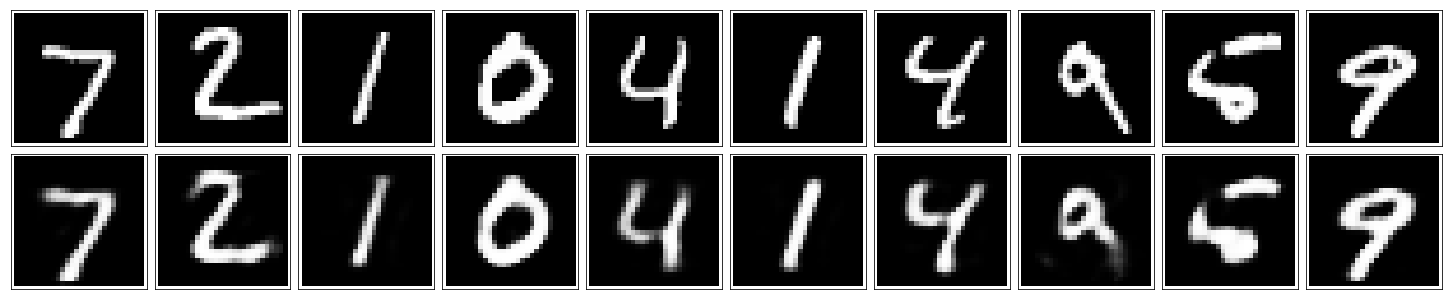

In [12]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [13]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.